In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os

In [15]:
notebook_dir = os.getcwd()

In [19]:
poverty_path = os.path.join(notebook_dir, '..', 'data', 'secondary_data', '2023_Poverty.csv')
map_path = os.path.join(notebook_dir, '..', 'data', 'secondary_data', 'tl_2024_25_tract','tl_2024_25_tract.shp')

In [20]:
# Replace with your GeoJSON file path

poverty_df = pd.read_csv(poverty_path)
map = gpd.read_file(map_path)

In [22]:
poverty_df = poverty_df[:1]

In [24]:
cols = poverty_df.columns.tolist()

In [25]:
tracts = [col.split(';')[0].strip() for col in cols]

In [28]:
len(tracts)

39

In [29]:
tracts = []
for col in cols:
    # print(col.split(';')[0].strip())
    if len(col.split(';')) == 3:
        tracts.append(col.split(';')[0].strip()+ ' '+ col.split(';')[2].split('!!')[-1])
    else:
        tracts.append(col.split(';')[0].strip())

In [8]:
len(tracts)

39

In [31]:
poverty_df.columns = tracts

In [32]:
poverty_df = poverty_df.T.reset_index()

In [33]:
poverty_df.reset_index().iloc[0].values

array([np.int64(0), 'Label (Grouping)',
       'Population for whom poverty status is determined'], dtype=object)

In [34]:
poverty_df = poverty_df[1:]

In [35]:
map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,017,336202,25017336202,1400000US25017336202,3362.02,Census Tract 3362.02,G5020,S,1057126,0,+42.4612832,-071.0549338,"POLYGON ((-71.06467 42.45615, -71.06396 42.457..."
1,25,017,330102,25017330102,1400000US25017330102,3301.02,Census Tract 3301.02,G5020,S,9782616,68833,+42.5784007,-071.0844481,"POLYGON ((-71.111 42.6011, -71.111 42.60116, -..."
2,25,017,339101,25017339101,1400000US25017339101,3391.01,Census Tract 3391.01,G5020,S,875342,15666,+42.4203623,-071.1105792,"POLYGON ((-71.11831 42.42477, -71.11742 42.424..."
3,25,017,356703,25017356703,1400000US25017356703,3567.03,Census Tract 3567.03,G5020,S,1106008,404985,+42.4095378,-071.1574723,"POLYGON ((-71.16711 42.40784, -71.16713 42.408..."
4,25,017,330202,25017330202,1400000US25017330202,3302.02,Census Tract 3302.02,G5020,S,7276186,446272,+42.5753419,-071.1260542,"POLYGON ((-71.13674 42.55346, -71.13607 42.556..."


In [36]:
poverty_df.columns = ['label', 'value']

In [37]:
poverty_df['tract'] = poverty_df['label'].str.extract(r'(Census Tract \d+)')
poverty_df['type'] = poverty_df['label'].str.extract(r'(Estimate|Margin of Error)')

# Pivot to wide format
poverty_wide = poverty_df.pivot(index='tract', columns='type', values='value').reset_index()

# Clean up numbers (remove commas, ±, etc.)
poverty_wide['Estimate'] = poverty_wide['Estimate'].str.replace(',', '').astype(float)
poverty_wide['Margin of Error'] = poverty_wide['Margin of Error'].str.replace('±', '').str.replace(',', '').astype(float)

In [38]:
poverty_wide

type,tract,Estimate,Margin of Error
0,NaN,87280.0,267.0
1,Census Tract 2501,4027.0,489.0
2,Census Tract 2502,6855.0,1210.0
3,Census Tract 2503,2684.0,494.0
4,Census Tract 2504,4411.0,696.0
5,Census Tract 2505,4450.0,729.0
6,Census Tract 2506,5910.0,803.0
7,Census Tract 2507,5379.0,711.0
8,Census Tract 2508,8208.0,887.0
9,Census Tract 2509,2249.0,476.0


In [39]:
map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,017,336202,25017336202,1400000US25017336202,3362.02,Census Tract 3362.02,G5020,S,1057126,0,+42.4612832,-071.0549338,"POLYGON ((-71.06467 42.45615, -71.06396 42.457..."
1,25,017,330102,25017330102,1400000US25017330102,3301.02,Census Tract 3301.02,G5020,S,9782616,68833,+42.5784007,-071.0844481,"POLYGON ((-71.111 42.6011, -71.111 42.60116, -..."
2,25,017,339101,25017339101,1400000US25017339101,3391.01,Census Tract 3391.01,G5020,S,875342,15666,+42.4203623,-071.1105792,"POLYGON ((-71.11831 42.42477, -71.11742 42.424..."
3,25,017,356703,25017356703,1400000US25017356703,3567.03,Census Tract 3567.03,G5020,S,1106008,404985,+42.4095378,-071.1574723,"POLYGON ((-71.16711 42.40784, -71.16713 42.408..."
4,25,017,330202,25017330202,1400000US25017330202,3302.02,Census Tract 3302.02,G5020,S,7276186,446272,+42.5753419,-071.1260542,"POLYGON ((-71.13674 42.55346, -71.13607 42.556..."


In [40]:
map['NAME'] = map['NAME'].astype(str).str.split('.').str[0]


In [41]:
map['NAME'] = 'Census Tract ' + map['NAME']

In [42]:
map['NAME']

0       Census Tract 3362
1       Census Tract 3301
2       Census Tract 3391
3       Census Tract 3567
4       Census Tract 3302
              ...        
1615     Census Tract 708
1616     Census Tract 612
1617     Census Tract 708
1618     Census Tract 606
1619     Census Tract 709
Name: NAME, Length: 1620, dtype: object

In [43]:
merged_gdf = pd.merge(poverty_wide, map, left_on='tract', right_on='NAME', how='left')

In [44]:
merged_gdf = merged_gdf[1:]

In [45]:
merged_gdf.head()

,tract,Estimate,Margin of Error,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,Census Tract 2501,4027.0,489.0,25,009,250100,25009250100,1400000US25009250100,Census Tract 2501,Census Tract 2501,G5020,S,852256.0,198746.0,+42.7054006,-071.1581972,"POLYGON ((-71.16964 42.70664, -71.16917 42.706..."
2,Census Tract 2502,6855.0,1210.0,25,009,250200,25009250200,1400000US25009250200,Census Tract 2502,Census Tract 2502,G5020,S,1456654.0,21771.0,+42.7062117,-071.1839672,"POLYGON ((-71.19121 42.71057, -71.19092 42.710..."
3,Census Tract 2503,2684.0,494.0,25,009,250300,25009250300,1400000US25009250300,Census Tract 2503,Census Tract 2503,G5020,S,500275.0,21867.0,+42.7122643,-071.1779023,"POLYGON ((-71.18359 42.71505, -71.18314 42.715..."
4,Census Tract 2504,4411.0,696.0,25,009,250400,25009250400,1400000US25009250400,Census Tract 2504,Census Tract 2504,G5020,S,322704.0,5102.0,+42.7170924,-071.1743747,"POLYGON ((-71.17883 42.71786, -71.17673 42.719..."
5,Census Tract 2505,4450.0,729.0,25,009,250500,25009250500,1400000US25009250500,Census Tract 2505,Census Tract 2505,G5020,S,300558.0,3894.0,+42.7169313,-071.1693673,"POLYGON ((-71.17166 42.72127, -71.1709 42.7208..."


In [46]:
merged_gdf['geometry']

1     POLYGON ((-71.16964 42.70664, -71.16917 42.706...
2     POLYGON ((-71.19121 42.71057, -71.19092 42.710...
3     POLYGON ((-71.18359 42.71505, -71.18314 42.715...
4     POLYGON ((-71.17883 42.71786, -71.17673 42.719...
5     POLYGON ((-71.17166 42.72127, -71.1709 42.7208...
6     POLYGON ((-71.17242 42.72166, -71.17115 42.723...
7     POLYGON ((-71.16562 42.71646, -71.16512 42.716...
8     POLYGON ((-71.15342 42.72004, -71.15341 42.720...
9     POLYGON ((-71.15623 42.71452, -71.15616 42.714...
10    POLYGON ((-71.16394 42.71421, -71.16362 42.714...
11    POLYGON ((-71.17681 42.71539, -71.17671 42.715...
12    POLYGON ((-71.17158 42.70899, -71.17009 42.709...
13    POLYGON ((-71.17822 42.69778, -71.17813 42.697...
14    POLYGON ((-71.18927 42.69852, -71.18908 42.698...
15    POLYGON ((-71.18886 42.69627, -71.18732 42.695...
16    POLYGON ((-71.16514 42.70131, -71.16425 42.701...
17    POLYGON ((-71.15952 42.69429, -71.15816 42.694...
18    POLYGON ((-71.18606 42.67934, -71.18418 42

In [47]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

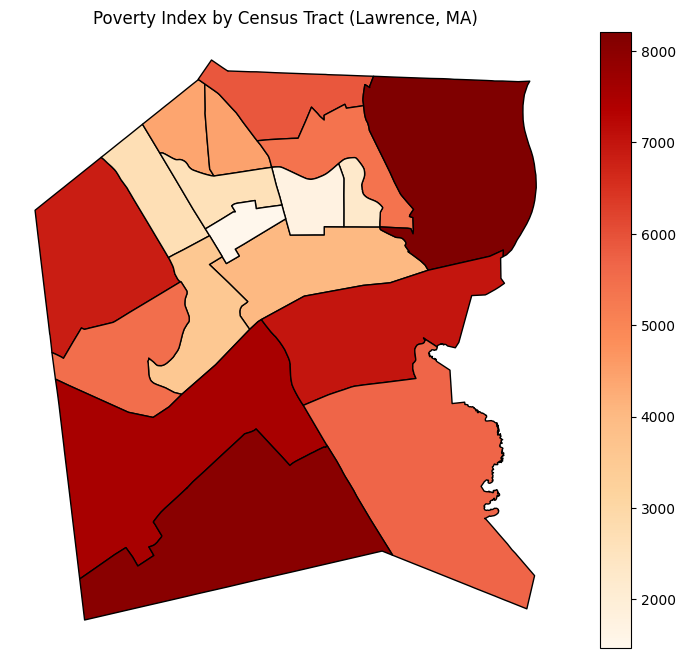

In [48]:
# Plot the tracts, colored by the poverty index column
fig, ax = plt.subplots(figsize=(10, 8))
merged_gdf.plot(
    column='Estimate',      # Column with poverty index values
    cmap='OrRd',              # Color map for visualization
    legend=True,              # Show color legend
    edgecolor='black',        # Optional: black borders for tracts
    ax=ax
)
ax.set_title('Poverty Index by Census Tract (Lawrence, MA)')
plt.axis('off')
plt.show()

In [49]:
secondary_data_path = os.path.join(notebook_dir, '..', 'data', 'secondary_data')

In [ ]:
# Save merged_gdf
merged_gdf.to_file(os.path.join(secondary_data_path, 'poverty_boundary.geojson'), driver="GeoJSON")